### Browserhistory

In [1]:
import json

import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy.interpolate import make_interp_spline, BSpline

%matplotlib inline

def create_smooth_dates(x, y, points=300):
    """ points is the number of points between x and y
        Lists of datetimes are expected for x and y lists of floats/ints
    """
    x_smooth = np.linspace(0,len(x),points) 
    spl = make_interp_spline(np.arange(0, len(x), 1), y, k=3) #BSpline object
    y_smooth = spl(x_smooth)
    x_smooth = [min(x) + timedelta(days=i) for i in range(0, points)]
    y_smooth = [i if i>0 else 0 for i in y_smooth]
    return x_smooth, y_smooth

def load_prepare_data(json_path):
    with open(json_path) as f:
        data = json.load(f)
    df = pd.DataFrame(data['Browser History'])
    df['date'] = df.apply(lambda row: datetime.utcfromtimestamp(row.time_usec/1000000).strftime('%Y-%m-%d %H:%M:%S'), 1)
    df.date = pd.to_datetime(df.date)
    df.set_index('date', inplace=True)
    return df

In [2]:
df = load_prepare_data('test.json')

**Visualize Number of Sites visited by either clicking on link or typing in browser**

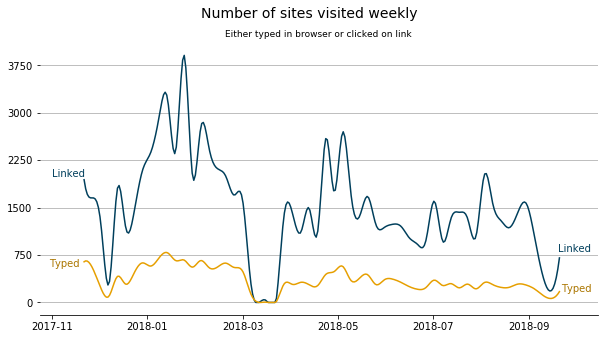

In [3]:
# prepare data
linked = df.loc[df.page_transition.isin(['LINK'])].resample('7D').count()
typed = df.loc[df.page_transition.isin(['TYPED'])].resample('7D').count()

# create smooth lines
x_link, y_link = create_smooth_dates(linked.index, linked.url)
x_typed, y_typed = create_smooth_dates(typed.index, typed.url)

# plot figure
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_link, y_link, label='link', color='#003f5c')
ax.plot(x_typed, y_typed, label='typed',color='#e69f00')

# Set number of xticks
ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))   #to get a tick every 60 days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlim(xmin=min(x_typed) - timedelta(days=28), xmax=max(x_typed) + timedelta(days=24)) # xtick range
ax.tick_params(labelright=True, right=True) # set right ticks and labels

# Set number of yticks based on stepsize (=1000)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end, 750))
plt.yticks(fontsize=10)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Create labels
plt.xlabel('', fontsize=14)
plt.suptitle('Number of sites visited weekly', fontsize=14)
plt.title('Either typed in browser or clicked on link', fontsize=9)

# Create line labels
plt.text(min(x_link) + timedelta(days=-20),y_link[0]+50,'Linked',rotation=0, color='#003f5c')
plt.text(max(x_link) + timedelta(days=-1),y_link[-1]+100,'Linked',rotation=0, color='#003f5c')

plt.text(min(x_typed) + timedelta(days=-22),y_typed[0]-80,'Typed',rotation=0, color='#ab7600')
plt.text(max(x_typed) + timedelta(days=1),y_typed[-1],'Typed',rotation=0, color='#ab7600')

# show plot and create grid
plt.grid(axis='y')
plt.show()

**Most frequently visited sites**

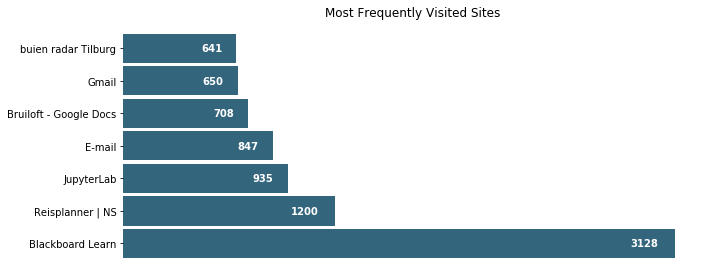

In [90]:
# prepare data
to_include = ['My Study – Blackboard Learn', 'Reisplanner | Reisinformatie | NS', 
         'JupyterLab', 'E-mail - Outlook', 'Bruiloft - Google Documenten', 'Gmail',
         'Weer, buien radar Tilburg 14 daagse weersverwachting Tilburg']
titles = ['Blackboard Learn', 'Reisplanner | NS', 
         'JupyterLab', 'E-mail', 'Bruiloft - Google Docs', 'Gmail',
         'buien radar Tilburg']
values = df.loc[df.title.isin(to_include), 'title'].value_counts().values[:len(to_include)]
n_groups = len(titles)

# prepare figure variables
index = np.arange(n_groups)
bar_width = 0.9
opacity = .8

# create figure
fig, ax = plt.subplots(figsize=(10, 4))
rects = ax.barh(index, values, bar_width,
                alpha=opacity, color='#003f5c',
                label='My Grade')

# create labels and ticks
ax.set_title('Most Frequently Visited Sites')
ax.set_yticks(index)
ax.set_yticklabels(titles)

# create values in bars
for i, v in enumerate(values):
    if v < 1000:
        ax.text(v-200, i, str(v), color='white', va='center', fontweight='bold')
    elif v <10000:
        ax.text(v-250, i, str(v), color='white', va='center',fontweight='bold')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_ticks([])

# plot and save fig
fig.tight_layout()
plt.show()
# plt.savefig('scores.png', dpi=300)